# Hotdog or not hotdog
The final model used in Streamlit is Model 2. This models is a CNN with regularization.

In [ ]:
# imports

import os
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
#Connecting google drive to this computer instances file system

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data upload

In [ ]:
train_ds = image_dataset_from_directory(
    '/content/drive/MyDrive/GA_DataScience/Project_5_Hotdog/data/train',
    subset= 'training',
    batch_size = 32,
    seed = 123,
    labels='inferred', #inferring labels from directory structure
    validation_split=0.2
).map(lambda x, y: (x/255, y))

val_ds = image_dataset_from_directory(
    '/content/drive/MyDrive/GA_DataScience/Project_5_Hotdog/data/train',
    subset='validation',
    batch_size = 32,
    seed = 123,
    labels='inferred',
    validation_split=0.2
).map(lambda x, y: (x/255, y))


test_ds = image_dataset_from_directory(
    '/content/drive/MyDrive/GA_DataScience/Project_5_Hotdog/data/test',
    batch_size = 32,
    seed = 123,
    labels='inferred'
).map(lambda x, y: (x/255, y))

Found 4242 files belonging to 2 classes.
Using 3394 files for training.
Found 4242 files belonging to 2 classes.
Using 848 files for validation.
Found 400 files belonging to 2 classes.


In [ ]:
for x, y, in train_ds:
  break

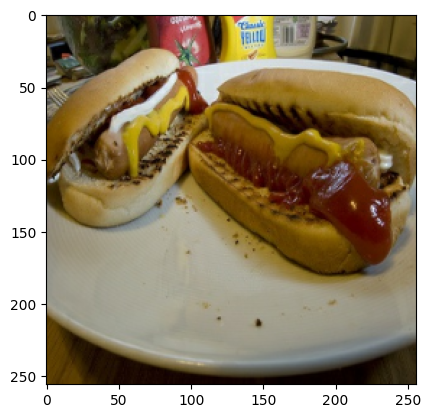

In [ ]:
plt.imshow(x[0]);

In [ ]:
x.shape

TensorShape([32, 256, 256, 3])

# Model 1: CNN

In [ ]:
model = keras.models.Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2),
    Conv2D(64, 2, activation='relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
    ])

model.compile(
    loss= 'binary_crossentropy',
    optimizer='rmsprop',
    metrics=['acc']
)

In [ ]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
    )

Epoch 1/10
107/107 [==============================] - 7s 51ms/step - loss: 0.9817 - acc: 0.5990 - val_loss: 0.6733 - val_acc: 0.6403
Epoch 2/10
107/107 [==============================] - 6s 52ms/step - loss: 0.5922 - acc: 0.6903 - val_loss: 0.6627 - val_acc: 0.5991
Epoch 3/10
107/107 [==============================] - 6s 52ms/step - loss: 0.5130 - acc: 0.7555 - val_loss: 0.8679 - val_acc: 0.5849
Epoch 4/10
107/107 [==============================] - 6s 52ms/step - loss: 0.4116 - acc: 0.8253 - val_loss: 0.9860 - val_acc: 0.6238
Epoch 5/10
107/107 [==============================] - 6s 54ms/step - loss: 0.3035 - acc: 0.8804 - val_loss: 1.3705 - val_acc: 0.5837
Epoch 6/10
107/107 [==============================] - 6s 54ms/step - loss: 0.2278 - acc: 0.9207 - val_loss: 1.5031 - val_acc: 0.5825
Epoch 7/10
107/107 [==============================] - 6s 53ms/step - loss: 0.1518 - acc: 0.9523 - val_loss: 1.1920 - val_acc: 0.6392
Epoch 8/10
107/107 [==============================] - 6s 52ms/step - 

# Model 2: CNN with Augmentation - Final model

In [ ]:
model2 = keras.models.Sequential([
    RandomFlip('horizontal_and_vertical', input_shape=(256, 256, 3)),
    RandomRotation(0.2),
    RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
    Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2),
    Conv2D(64, 2, activation='relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
    ])

model2.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['acc']
)

In [ ]:
model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
107/107 [==============================] - 7s 50ms/step - loss: 0.8088 - acc: 0.5946 - val_loss: 0.6315 - val_acc: 0.6663
Epoch 2/10
107/107 [==============================] - 6s 53ms/step - loss: 0.6312 - acc: 0.6511 - val_loss: 0.6454 - val_acc: 0.6450
Epoch 3/10
107/107 [==============================] - 6s 54ms/step - loss: 0.6212 - acc: 0.6676 - val_loss: 0.6146 - val_acc: 0.6722
Epoch 4/10
107/107 [==============================] - 6s 57ms/step - loss: 0.6140 - acc: 0.6650 - val_loss: 0.6300 - val_acc: 0.6380
Epoch 5/10
107/107 [==============================] - 6s 54ms/step - loss: 0.6078 - acc: 0.6585 - val_loss: 0.6463 - val_acc: 0.6167
Epoch 6/10
107/107 [==============================] - 6s 52ms/step - loss: 0.6029 - acc: 0.6750 - val_loss: 0.6481 - val_acc: 0.6568
Epoch 7/10
107/107 [==============================] - 6s 52ms/step - loss: 0.6003 - acc: 0.6697 - val_loss: 0.5896 - val_acc: 0.6769
Epoch 8/10
107/107 [==============================] - 6s 52ms/step - 

In [ ]:
model2.predict(test_ds)

13/13 [==============================] - 1s 17ms/step


array([[0.9512564 ],
       [0.6300858 ],
       [0.94511104],
       [0.9424898 ],
       [0.96343863],
       [0.8357221 ],
       [0.9717541 ],
       [0.9984503 ],
       [0.9401975 ],
       [0.40013433],
       [0.99382013],
       [0.9319227 ],
       [0.9762679 ],
       [0.8266689 ],
       [0.8956222 ],
       [0.99214196],
       [0.95133096],
       [0.9971052 ],
       [0.96655256],
       [0.98906916],
       [0.8303179 ],
       [0.87906915],
       [0.9154149 ],
       [0.9945205 ],
       [0.9214009 ],
       [0.9113522 ],
       [0.91231006],
       [0.73318326],
       [0.9663017 ],
       [0.8837618 ],
       [0.8956968 ],
       [0.96944964],
       [0.9450042 ],
       [0.97609645],
       [0.84015954],
       [0.96392906],
       [0.5871539 ],
       [0.98105717],
       [0.52332294],
       [0.9863238 ],
       [0.9727869 ],
       [0.9691955 ],
       [0.8576017 ],
       [0.8994445 ],
       [0.81500715],
       [0.7646741 ],
       [0.94548184],
       [0.716

In [ ]:
history = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='skyblue', label='Validation Loss')
plt.legend();

Epoch 1/10
107/107 [==============================] - 6s 55ms/step - loss: 0.5856 - acc: 0.6859 - val_loss: 0.5789 - val_acc: 0.7064
Epoch 2/10
107/107 [==============================] - 6s 54ms/step - loss: 0.5725 - acc: 0.6847 - val_loss: 0.5822 - val_acc: 0.6910
Epoch 3/10
107/107 [==============================] - 6s 53ms/step - loss: 0.5674 - acc: 0.6936 - val_loss: 0.6936 - val_acc: 0.6533
Epoch 4/10
107/107 [==============================] - 6s 53ms/step - loss: 0.5648 - acc: 0.7060 - val_loss: 0.6692 - val_acc: 0.6604
Epoch 5/10
107/107 [==============================] - 6s 54ms/step - loss: 0.5587 - acc: 0.7074 - val_loss: 0.6352 - val_acc: 0.6958
Epoch 6/10
107/107 [==============================] - 6s 51ms/step - loss: 0.5606 - acc: 0.7027 - val_loss: 0.6421 - val_acc: 0.6969
Epoch 7/10
107/107 [==============================] - 6s 53ms/step - loss: 0.5525 - acc: 0.7148 - val_loss: 0.5397 - val_acc: 0.7300
Epoch 8/10
107/107 [==============================] - 6s 52ms/step - 

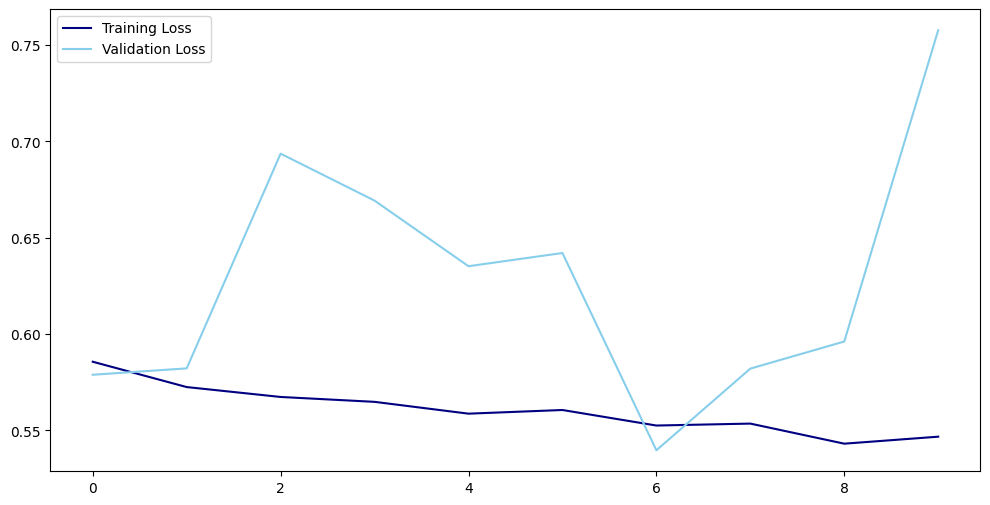

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='skyblue', label='Validation Loss')
plt.legend();

In [ ]:
model2.save('/content/drive/MyDrive/GA_DataScience/Project_5_Hotdog/hotdog_or_notdog2.h5')
model2.save('/content/drive/MyDrive/GA_DataScience/Project_5_Hotdog/hotdog_or_notdog2.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Other models

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False
)

for layer in conv_base.layers:
  layer.trainable = False

In [ ]:
conv_base.summary()

In [ ]:
data_aug = keras.models.Sequential([
    RandomFlip('horizontal_and_vertical', input_shape=(256, 256, 3)),
    RandomRotation(0.2),
    RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
    RandomContrast([0, 255])
])

In [ ]:
inputs = keras.Input(shape=(256, 256, 3))
x = data_aug(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model3 = keras.Model(inputs, outputs)

In [ ]:
model3.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['acc']
)

In [ ]:
model3.summary()

In [ ]:
model3.fit(
    train_ds,
    validation_data=val_ds,
    epochs=1)

107/107 [==============================] - 8s 53ms/step - loss: 1.9179 - acc: 0.5978 - val_loss: 0.6980 - val_acc: 0.4906


In [ ]:
model3.predict(test_ds)

13/13 [==============================] - 1s 31ms/step


array([[0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.49896947],
       [0.498

In [ ]:
model4 = keras.models.Sequential([
    RandomFlip('horizontal_and_vertical', input_shape=(256, 256, 3)),
    RandomRotation(0.2),
    RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
    RandomContrast([0, 255]),
    Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2),
    Conv2D(64, 2, activation='relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
    ])

model4.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['acc']
)

model4.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
107/107 [==============================] - 7s 51ms/step - loss: 3.5490 - acc: 0.4909 - val_loss: 0.6932 - val_acc: 0.4906
Epoch 2/10
107/107 [==============================] - 6s 52ms/step - loss: 0.6932 - acc: 0.4988 - val_loss: 0.6933 - val_acc: 0.4906
Epoch 3/10
107/107 [==============================] - 6s 53ms/step - loss: 0.6932 - acc: 0.5024 - val_loss: 0.6933 - val_acc: 0.4906
Epoch 4/10
107/107 [==============================] - 6s 52ms/step - loss: 0.6932 - acc: 0.5024 - val_loss: 0.6933 - val_acc: 0.4906
Epoch 5/10
107/107 [==============================] - 6s 53ms/step - loss: 0.6932 - acc: 0.5024 - val_loss: 0.6933 - val_acc: 0.4906
Epoch 6/10
107/107 [==============================] - 6s 52ms/step - loss: 0.6932 - acc: 0.5024 - val_loss: 0.6933 - val_acc: 0.4906
Epoch 7/10
107/107 [==============================] - 6s 53ms/step - loss: 0.6935 - acc: 0.5018 - val_loss: 0.6933 - val_acc: 0.4906
Epoch 8/10
107/107 [==============================] - 6s 52ms/step - 

In [ ]:
inputs2 = keras.Input(shape=(256, 256, 3))
x2 = data_aug(inputs2)
x2 = keras.applications.vgg16.preprocess_input(x2)
x2 = conv_base(x2)
x2 = Flatten()(x2)
x2 = Dense(16, activation='relu')(x2)
x2 = Dropout(0.5)(x2)
outputs = Dense(1, activation='sigmoid')(x2)

model5 = keras.Model(inputs2, outputs)

model5.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['acc']
)

model5.fit(
    train_ds,
    validation_data=val_ds,
    epochs=1)

107/107 [==============================] - 8s 57ms/step - loss: 0.7263 - acc: 0.4897 - val_loss: 0.6932 - val_acc: 0.4906


In [ ]:
# pd.read_csv('/content/drive/MyDrive/GA_DataScience/Project 5 Hotdog/data/train.csv')

In [ ]:
model2.save('/content/drive/MyDrive/GA_DataScience/Project_5_Hotdog/hotdog_or_notdog.h5')

In [ ]:
with open("/content/drive/MyDrive/GA_DataScience/Project_5_Hotdog/hotdog-model.pkl", "wb") as file:
    pickle.dump(model2, file)

In [ ]:
# load saved model

with open('hotdog-model_pkl' , 'rb') as f:
    model2 = pickle.load(f)

In [ ]:
print(model4.predict(test_ds))

In [ ]:
model.save('/content/drive/MyDrive/GA_DataScience/Project_5_Hotdog/hotdog_or_notdog.h5')
model.save('/content/drive/MyDrive/GA_DataScience/Project_5_Hotdog/hotdog_or_notdog.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_load = keras.models.load_model('hotdog_or_notdog.h5')
model_load.summary()

In [ ]:
type(test_ds)

tensorflow.python.data.ops.map_op._MapDataset